In [1]:
import sunpy.data.sample#pixle reduction 
import sunpy.map    #pixle reduction

import sunpy 
import astropy.units as u
from sunpy.net import Fido, attrs as a 
import astropy.time
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection
import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [17]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Juans Test Data p2\*')

In [18]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

In [19]:
Diff = [] #Consequtive Differences
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i]) 
    
Diff = np.array(Diff)

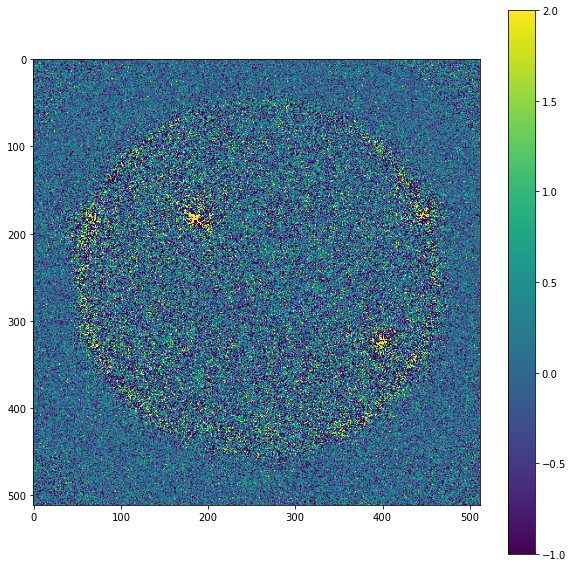

In [20]:
#Just a plot for the Difference from the start

plt.figure(figsize=(10,10))
plt.imshow(Diff[0],vmin = -1, vmax = 2)  
plt.colorbar()
plt.show()

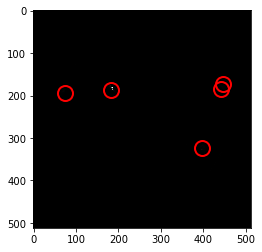

In [6]:
#locates Gaussian-like blobs of Sun
f = tp.locate(Arr[1], 11, invert=True, minmass=100) 
tp.annotate(f,Arr[1]);#Creates graph of f

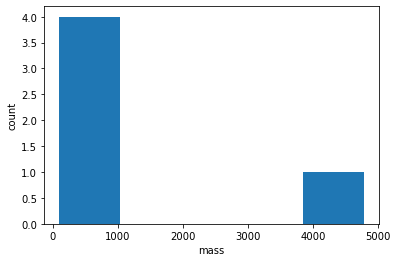

In [7]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=5)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [8]:
r = tp.batch(Arr,11, minmass =100); 

Frame 73: 1 features


In [9]:
t = tp.link(r, 11, memory=4)

Frame 73: 1 trajectories present.


In [10]:
t1 = tp.filter_stubs(t,73) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 5
After: 1


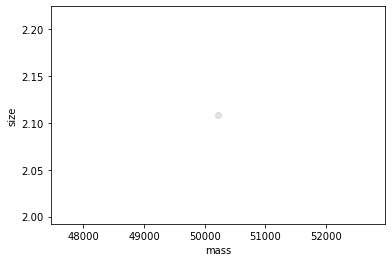

<AxesSubplot:xlabel='mass', ylabel='size'>

In [11]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

In [12]:
#Filters our particls from t1 
t2 = t1[((t1['mass'] <51000 ) & (t1['size'] > 2) &
         (t1['ecc'] < 1))] 

In [13]:
R = 203.211425

In [14]:
iloc_valid = []

for i in range(len(t2)):
    r = np.sqrt((t2['x'].iloc[i]- 258.853546125)**2 + (t2['y'].iloc[i] - 251.0950775)**2)
    if r<R: 
        (r, t2['particle'].iloc[i])
        iloc_valid.append(i)  

In [66]:
print (iloc_valid)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [15]:
fra = max(t2.iloc[iloc_valid]['frame']) + 1

In [16]:
Bull=[]
for i in range(fra): 
    s= t2.iloc[iloc_valid].loc[i].sum(axis=0).loc['signal']  
    Bull+=[s]

AttributeError: 'numpy.float64' object has no attribute 'loc'

In [ ]:
x = np.array(range(fra))
y = np.array(Bull)

plt.title('Light Curve')
plt.plot(x, y, color="red")

plt.show()